## Task Two for GRIP - The Sparks Foundation
### Presented By
>KARTHIK R

### This project is the unsupervised classification of data from the iris dataset.

#### Dataset link
>https://bit.ly/3kXTdox

## Importing libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

get_ipython().run_line_magic('matplotlib','inline')

In [2]:
# Loading the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(8)

##iris_df = pd.read_csv('Iris_data_sample.csv', header = None)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


## To determine the optimal number of clusters for K-means, we will use the elbow method

In [3]:
distortions = []
inertias = []
mapping1 = {} #to store values of distortion
mapping2 = {} #to store values of inertia
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(iris_df)
    kmeanModel.fit(iris_df)
 
    distortions.append(sum(np.min(cdist(iris_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / iris_df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(iris_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / iris_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

## For various values of distortion obtained from the data

##### Data Distortion is the intentional or unintentional misrepresentation of a dataset

In [4]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.9440683605553906
2 : 0.8555777695266533
3 : 0.6480304904934434
4 : 0.5573847727333312
5 : 0.5096521951118286
6 : 0.4667718492713495
7 : 0.43908495650925516
8 : 0.4123366378937021
9 : 0.39618178134815313


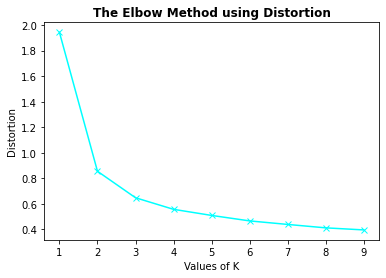

In [5]:
plt.plot(K, distortions, 'bx-', color = "cyan")
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion', weight = "bold")
plt.show()

## For various values of inertia obtained from the data

#####  Inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for.

In [6]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 681.3705999999996
2 : 152.34795176035797
3 : 78.851441426146
4 : 57.22847321428572
5 : 46.44618205128204
6 : 39.05845904095906
7 : 34.59294047619047
8 : 30.015880952380968
9 : 27.81271673501938


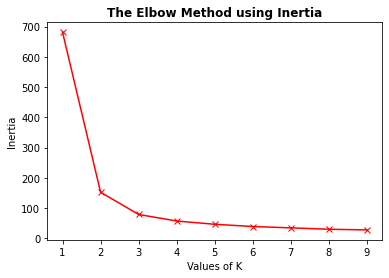

In [7]:
plt.plot(K, inertias, 'bx-', color = "red")
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia', weight = "bold")
plt.show()

### From both cases of the elbow method, we come to conclusion that 3 is the optimal number of clusters for this dataset.

In [8]:
model = KMeans(n_clusters=3)
model = model.fit_predict(iris_df)

## Visualization of Kmeans for 3 clusters on Iris dataset

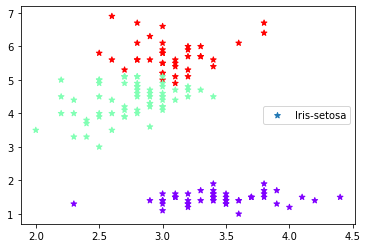

In [9]:
x = iris_df.iloc[:, [0,1,2,3]].values
plt.scatter(x[ : , 1], x[ : , 2], c = model, cmap = 'rainbow', marker = '*',label = 'Iris-setosa')
plt.legend()